In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

   price  maint doors persons lug_capacity safety output
0  vhigh  vhigh     2       2        small    low  unacc
1  vhigh  vhigh     2       2        small    med  unacc
2  vhigh  vhigh     2       2        small   high  unacc
3  vhigh  vhigh     2       2          med    low  unacc
4  vhigh  vhigh     2       2          med    med  unacc


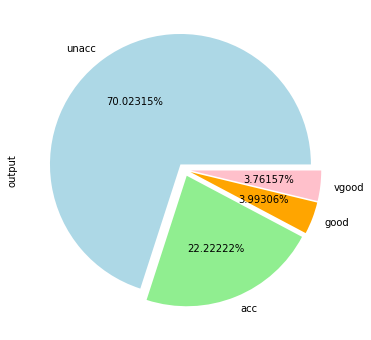

Case 0: SGD
------------------------------------------------------------
Epoch:0/1000 Error_train:1.3493152 Error_test:1.3549647
Epoch:100/1000 Error_train:0.47137204 Error_test:0.4950798
Epoch:200/1000 Error_train:0.27352893 Error_test:0.2929617
Epoch:300/1000 Error_train:0.20624481 Error_test:0.22885087
Epoch:400/1000 Error_train:0.16508257 Error_test:0.1930558
Epoch:500/1000 Error_train:0.13448861 Error_test:0.170366
Epoch:600/1000 Error_train:0.11032339 Error_test:0.15642412
Epoch:700/1000 Error_train:0.09029498 Error_test:0.14522904
Epoch:800/1000 Error_train:0.07426426 Error_test:0.13692512
Epoch:900/1000 Error_train:0.060826235 Error_test:0.1299449


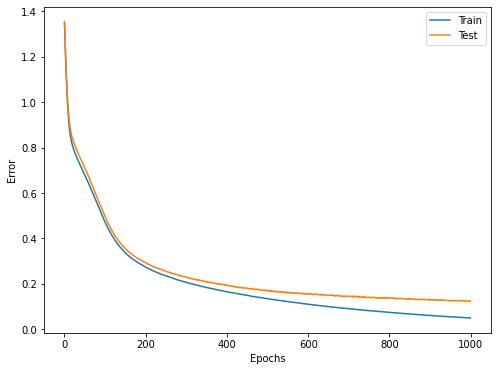

Accuracy Train: 99.07407407407408% Accuracy Test: 94.56018518518519%
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 21)                462       
_________________________________________________________________
dense_53 (Dense)             (None, 25)                550       
_________________________________________________________________
dense_54 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_55 (Dense)             (None, 4)                 104       
Total params: 1,766
Trainable params: 1,766
Non-trainable params: 0
_________________________________________________________________
None
Case 1: adagrad
------------------------------------------------------------
Epoch:0/1000 Error_train:1.5370858 Error_test:1.5297668
Epoch:100/1000 Error_train:0.30583972 Erro

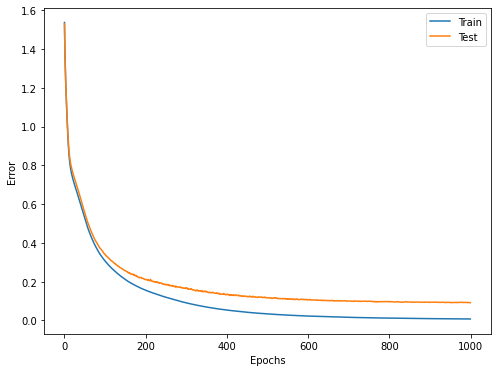

Accuracy Train: 100.0% Accuracy Test: 96.06481481481481%
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 21)                462       
_________________________________________________________________
dense_57 (Dense)             (None, 25)                550       
_________________________________________________________________
dense_58 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 104       
Total params: 1,766
Trainable params: 1,766
Non-trainable params: 0
_________________________________________________________________
None
Case 2: SGD + dropout
------------------------------
Epoch:0/1000 Error_train:1.4517274 Error_test:1.4523184
Epoch:100/1000 Error_train:0.4930342 Error_test:0.52125096
Epoch:200/1000 Erro

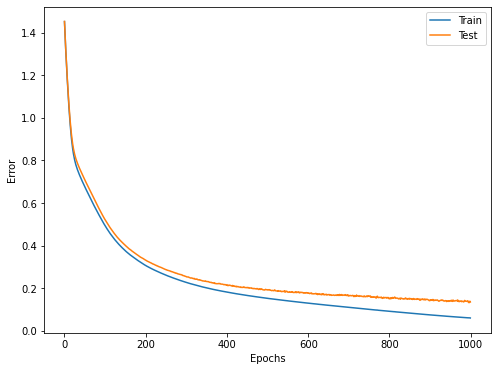

Accuracy Train: 99.07407407407408% Accuracy Test: 93.98148148148148%
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 21)                462       
_________________________________________________________________
dense_61 (Dense)             (None, 25)                550       
_________________________________________________________________
dense_62 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 4)                 104       
Total params: 1,766
Trainable params: 1,766
Non-trainable params: 0
_________________________________________________________________
None
Case 3: adagrad + dropout
-----------------

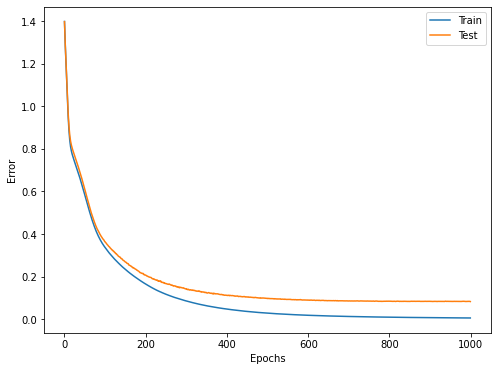

Accuracy Train: 100.0% Accuracy Test: 96.64351851851852%
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 21)                462       
_________________________________________________________________
dense_65 (Dense)             (None, 25)                550       
_________________________________________________________________
dense_66 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 4)                 104       
Total params: 1,766
Trainable params: 1,766
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
class fc_model:
  def __init__(self, optimizer, eta, n_in, n_mid, n_out, dropout_ratio=0.):
    if dropout_ratio == 0.: 
      self.model = Sequential([
          Dense(n_in, activation='relu'),
          Dense(n_mid, activation='relu'),
          Dense(n_mid, activation='relu'),
          Dense(n_out, activation='softmax')
      ])
    else:
      self.model = Sequential([
          Dense(n_in, activation='relu'),
          Dense(n_mid, activation='relu'),
          # Dropout(dropout_ratio),
          Dense(n_mid, activation='relu'),
          Dropout(dropout_ratio),
          Dense(n_out, activation='softmax')
      ]) 

    self.loss_fn = tf.keras.losses.CategoricalCrossentropy()

    if optimizer == "SGD":
      self.optimizer = tf.keras.optimizers.SGD(learning_rate=eta)
    elif optimizer == "adagrad":
      self.optimizer = tf.keras.optimizers.Adagrad(learning_rate=eta)

    
  def train_test(self, X_train, y_train, X_test, y_test, n_train, n_test, batch_size, epoch, interval):
    # -- 오차 기록용 --
    train_acc_metrics = tf.keras.metrics.CategoricalCrossentropy()
    test_acc_metrics = tf.keras.metrics.CategoricalCrossentropy()

    train_error_x = []
    train_error_y = []
    test_error_x = []
    test_error_y = []

    n_batch = n_train // batch_size # 1에포크 당 배치 수
    for i in range(epoch):
        # --오차 계측 --
        pred_train = self.model(X_train)
        train_acc_metrics(y_train, pred_train)
        error_train = train_acc_metrics.result().numpy()
        pred_test = self.model(X_test)
        test_acc_metrics(y_test, pred_test)
        error_test = test_acc_metrics.result().numpy()

        train_acc_metrics.reset_states()
        test_acc_metrics.reset_states()

        # -- 오차 기록 --
        train_error_x.append(i)
        train_error_y.append(error_train)
        test_error_x.append(i)
        test_error_y.append(error_test)

        # -- 경과 표시 --
        if i%interval == 0:
            print("Epoch:" + str(i) + "/" + str(epoch),
                  "Error_train:" + str(error_train),
                  "Error_test:" + str(error_test))
        
        # -- 학습 --
        index_random = np.arange(n_train)
        np.random.shuffle(index_random) # 인덱스 임의 섞기
        for j in range(n_batch):

            # 미니배치 샘플 추출
            mb_index = index_random[j*batch_size : (j+1)*batch_size]
            x = X_train[mb_index, :]
            t = y_train[mb_index, :]

            # 순전파와 역전파
            with tf.GradientTape() as tape:
                predictions = self.model(x)
                loss = self.loss_fn(t, predictions)
            
            gradients = tape.gradient(loss, self.model.trainable_weights)

            # 가중치와 편향 수정
            self.optimizer.apply_gradients(zip(gradients, self.model.trainable_weights))

    # -- 기록된 오차를 그래프로 표시 -- 
    plt.plot(train_error_x, train_error_y, label="Train")
    plt.plot(test_error_x, test_error_y, label="Test")
    plt.legend()

    plt.xlabel("Epochs")
    plt.ylabel("Error")

    plt.show()

    # -- 정답률 측정 -- 
    predictions_train = self.model(X_train)
    count_train = np.sum(np.argmax(predictions_train, axis=1) == np.argmax(y_train, axis=1))

    predictions_test = self.model(X_test)
    count_test = np.sum(np.argmax(predictions_test, axis=1) == np.argmax(y_test, axis=1))

    print("Accuracy Train:", str(count_train/n_train*100) + "%",
          "Accuracy Test:", str(count_test/n_test*100) + "%")
    print(self.model.summary())
    
def end_to_end_training():
  # -- car_evaluation 데이터 읽어 들이기 --  
  cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
  cars = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car_evaluation.csv", names=cols, header=None)
  n_data = len(cars)  # 샘플 수

  print(cars.head())

  plot_size = plt.rcParams["figure.figsize"]
  plot_size [0] = 8
  plot_size [1] = 6
  plt.rcParams["figure.figsize"] = plot_size

  cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

  plt.show()

  # -- 정답을 원-핫 인코딩으로 변경 --
  price = pd.get_dummies(cars.price, prefix='price')
  maint = pd.get_dummies(cars.maint, prefix='maint')

  doors = pd.get_dummies(cars.doors, prefix='doors')
  persons = pd.get_dummies(cars.persons, prefix='persons')

  lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
  safety = pd.get_dummies(cars.safety, prefix='safety')

  labels = pd.get_dummies(cars.output, prefix='condition')

  # -- 훈련 데이터와 테스트 데이터 --
  index = np.arange(n_data)
  index_train = index[index%2 == 0]
  index_test = index[index%2 != 0]

  input_data = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)
  correct_data = labels.values

  input_train = input_data.iloc[index_train, :]  # 훈련데이터 입력
  input_train = input_train.to_numpy()
  correct_train = correct_data[index_train, :]  # 훈련데이터 정답
  input_test = input_data.iloc[index_test, :]  # 테스트데이터 입력
  input_test = input_test.to_numpy()
  correct_test = correct_data[index_test, :]  # 테스트데이터 정답

  n_train = input_train.shape[0]  # 훈련데이터 샘플 수
  n_test = input_test.shape[0]  # 테스트데이터 샘플 수

  # -- 각 설정 값 --
  n_in = input_train.shape[1]  # 입력층 뉴런 수
  n_mid = 25  # 은닉층 뉴런 수
  n_out = correct_train.shape[1]  # 출력층 뉴런 수

  wb_width = 0.1  # 가중치와 편향 설정을 위한 정규분포 표준편차
  eta = 0.01  # 학습률
  epoch = 1000
  batch_size = 128
  interval = 100  # 경과 표시 간격

  optimizers = ["SGD", "adagrad"]
  dropout_ratio = 0.1

  for i, opt in enumerate(optimizers):
    print("=" * 60)
    print(f"Case {i}: {opt}")
    print("-" * 60)
    simple_model = fc_model(opt, eta, n_in, n_mid, n_out)
    simple_model.train_test(input_train, correct_train, input_test, correct_test, n_train, n_test, batch_size, epoch, interval)
  for i, opt in enumerate(optimizers):
    print("=" * 60)
    print(f"Case {i + 2}: {opt} + dropout")
    print("-" * 30)
    dropout_model = fc_model(opt, eta, n_in, n_mid, n_out, dropout_ratio)
    dropout_model.train_test(input_train, correct_train, input_test, correct_test, n_train, n_test, batch_size, epoch, interval)
    
end_to_end_training()